# Análise estatística da queda do IBOV 2020

## 1 - Importando as ferramentas

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pyfolio as pf 
import seaborn as sns
from scipy.stats import norm, t
import warnings
warnings.filterwarnings('ignore')
#pd.options.display.float_format = '{:.6f}'.format


## 2 - Coletando os dados

In [54]:
end = '2020-03-11'

In [50]:
ibov = yf.download('^BVSP',end=end)

[*********************100%***********************]  1 of 1 completed


In [59]:
ibov_close = ibov['Close']
ibov_close.dropna(inplace=True)

## 3 - Visualizando os dados

## 4 - Tratando os dados

In [60]:
ibov_close['Return'] = ibov_close.pct_change()

## 5 - Analisando os dados

In [68]:
mean_ibov = ibov_close['Return'].mean()
print('Mean return = {:.2f}%'.format(mean_ibov*100))

Mean return = 0.15%


In [69]:
std_ibov = ibov_close['Return'].std()
print('Standart deviation return = {:.2f}%'.format(std_ibov*100))

Standart deviation return = 2.24%


In [70]:
# Another days that IBOV moved -12%
display(ibov_close[ibov_close['Return'] < -.12])

Ticker,^BVSP,Return
Date,,
1997-10-27,9817.000000,-0.149675
1998-09-10,4761.000000,-0.158090
2020-03-09,86067.000000,-0.121738


In [71]:
# What is the probability to IBOV move -12% considering the returns follow by a normal distribution?
theoric_prob = norm.cdf(-.12, loc=mean_ibov, scale=std_ibov)
print('{:.8f}%'.format(theoric_prob*100))


0.00000300%


In [77]:
freq_prob = 1.0 / theoric_prob
print('One time every {} days'.format(int(round(freq_prob, 5))))
print('Or one time every {} years'.format(int(round(freq_prob/252, 5))))

One time every 33333363 days
Or one time every 132275 years


<Axes: title={'center': 'Daily Return IBOVESPA'}, xlabel='Date'>

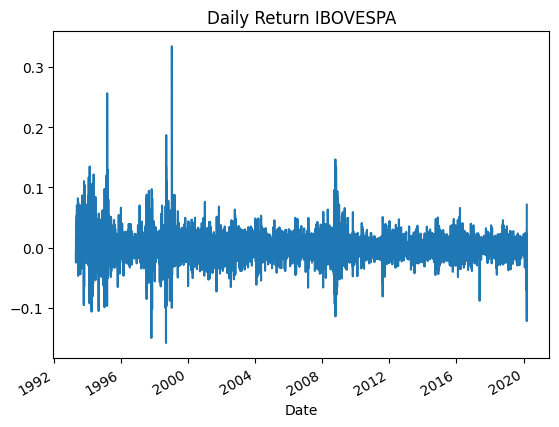

In [78]:
ibov_close['Return'].plot(title='Daily Return IBOVESPA')

In [79]:
ibov_close['Theorical Return'] = norm.rvs(size=ibov_close['Return'].size, loc=mean_ibov, scale=std_ibov)

(-0.2, 0.4)

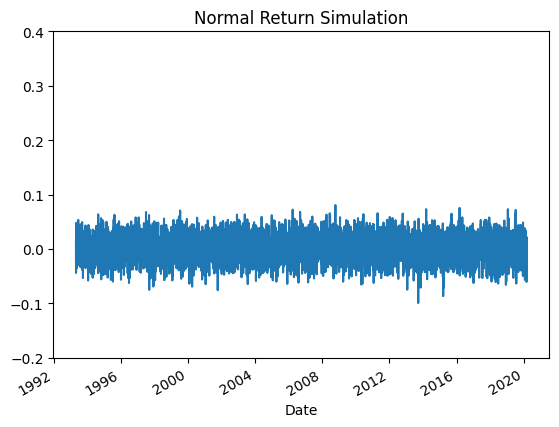

In [82]:
ax = ibov_close['Theorical Return'].plot(title='Normal Return Simulation')
ax.set_ylim(-0.2, 0.4)

<Axes: xlabel='Return'>

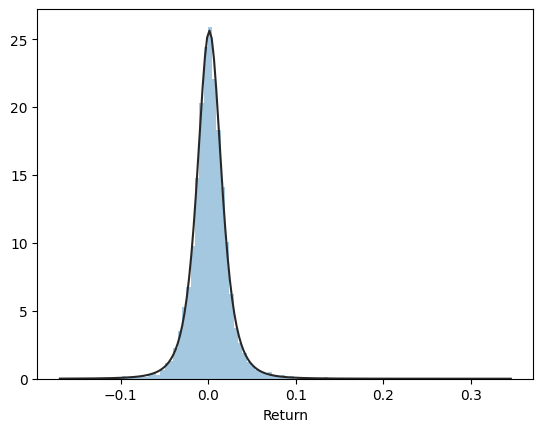

In [86]:
sns.distplot(ibov_close['Return'], bins=100, kde=False, fit=t)

In [98]:
(lib_deg, mean_t, std_t) = t.fit(ibov_close['Return'][1:])
print("T-Student Distribution\nLiberty Degrees={:.2f}\nMean={:.4f}\nStandart Deviation={:.5f}".format(lib_deg, mean_t, std_t))

T-Student Distribution
Liberty Degrees=3.31
Mean=0.0012
Standart Deviation=0.01445


In [99]:
theoric_prob_t = t.cdf(-.12, lib_deg, loc=mean_t, scale=std_t)
print('{:.8f}%'.format(theoric_prob_t*100))

0.12193330%


In [100]:
freq_theoric_t = 1.0 / theoric_prob_t
print('One time every {} days'.format(int(round(freq_theoric_t, 5))))
print('Or one time every {} years'.format(int(round(freq_theoric_t/252, 5))))

One time every 820 days
Or one time every 3 years


In [101]:
obs_freq = ibov_close['Return'].size / ibov_close[ibov_close['Return']<-.12].size
print('One time every {} days'.format(int(round(obs_freq, 5))))

One time every 738 days


In [102]:
# Impossible calculate low probabilities = errors in model or parameters 
# Exposure in events with low probabilities but do big impacts (black swan)